In [4]:
# # can comment this block out after first run
# !pip install --upgrade diffusers transformers scipy
# !huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        
Login successful
Your token has been saved to C:\Users\Alex/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your termin

In [1]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [2]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

use_half_precision = True

if use_half_precision:
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_auth_token=True)
else:
    pipe = StableDiffusionPipeline.from_pretrained(model_id, use_auth_token=False)
pipe = pipe.to(device)

pipe.safety_checker = lambda images, clip_input: (images, [False] * len(images))

Downloading:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

"beautiful mountains and forested landscape with cabine next to lake, early twilight, magical aurora, high quality painting photoreal, ray tracing" - StableDiffusion v1.4


0it [00:00, ?it/s]

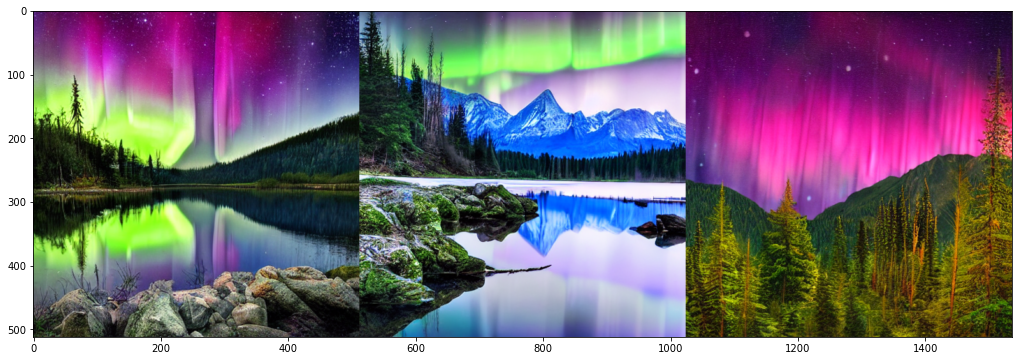

0it [00:00, ?it/s]

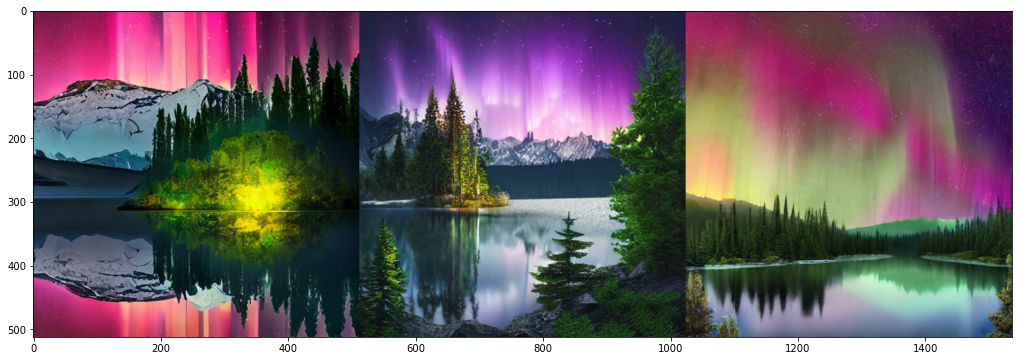

0it [00:00, ?it/s]

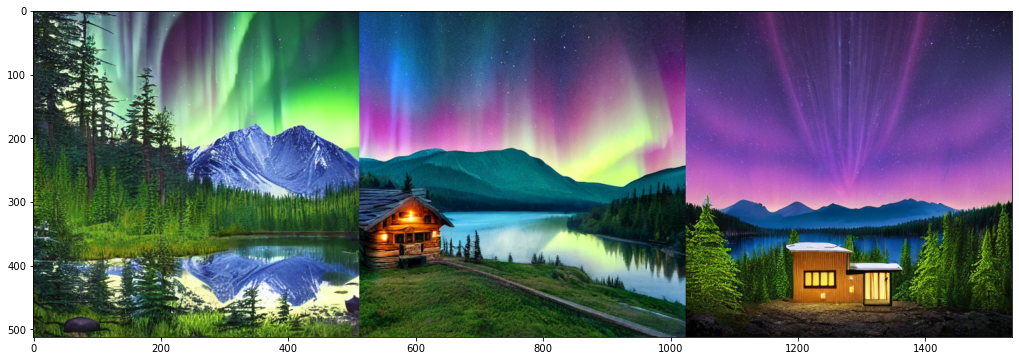

"beautiful mountains and forested landscape with cabine next to lake, early twilight, magical aurora, high quality painting photoreal, ray tracing" - StableDiffusion v1.4


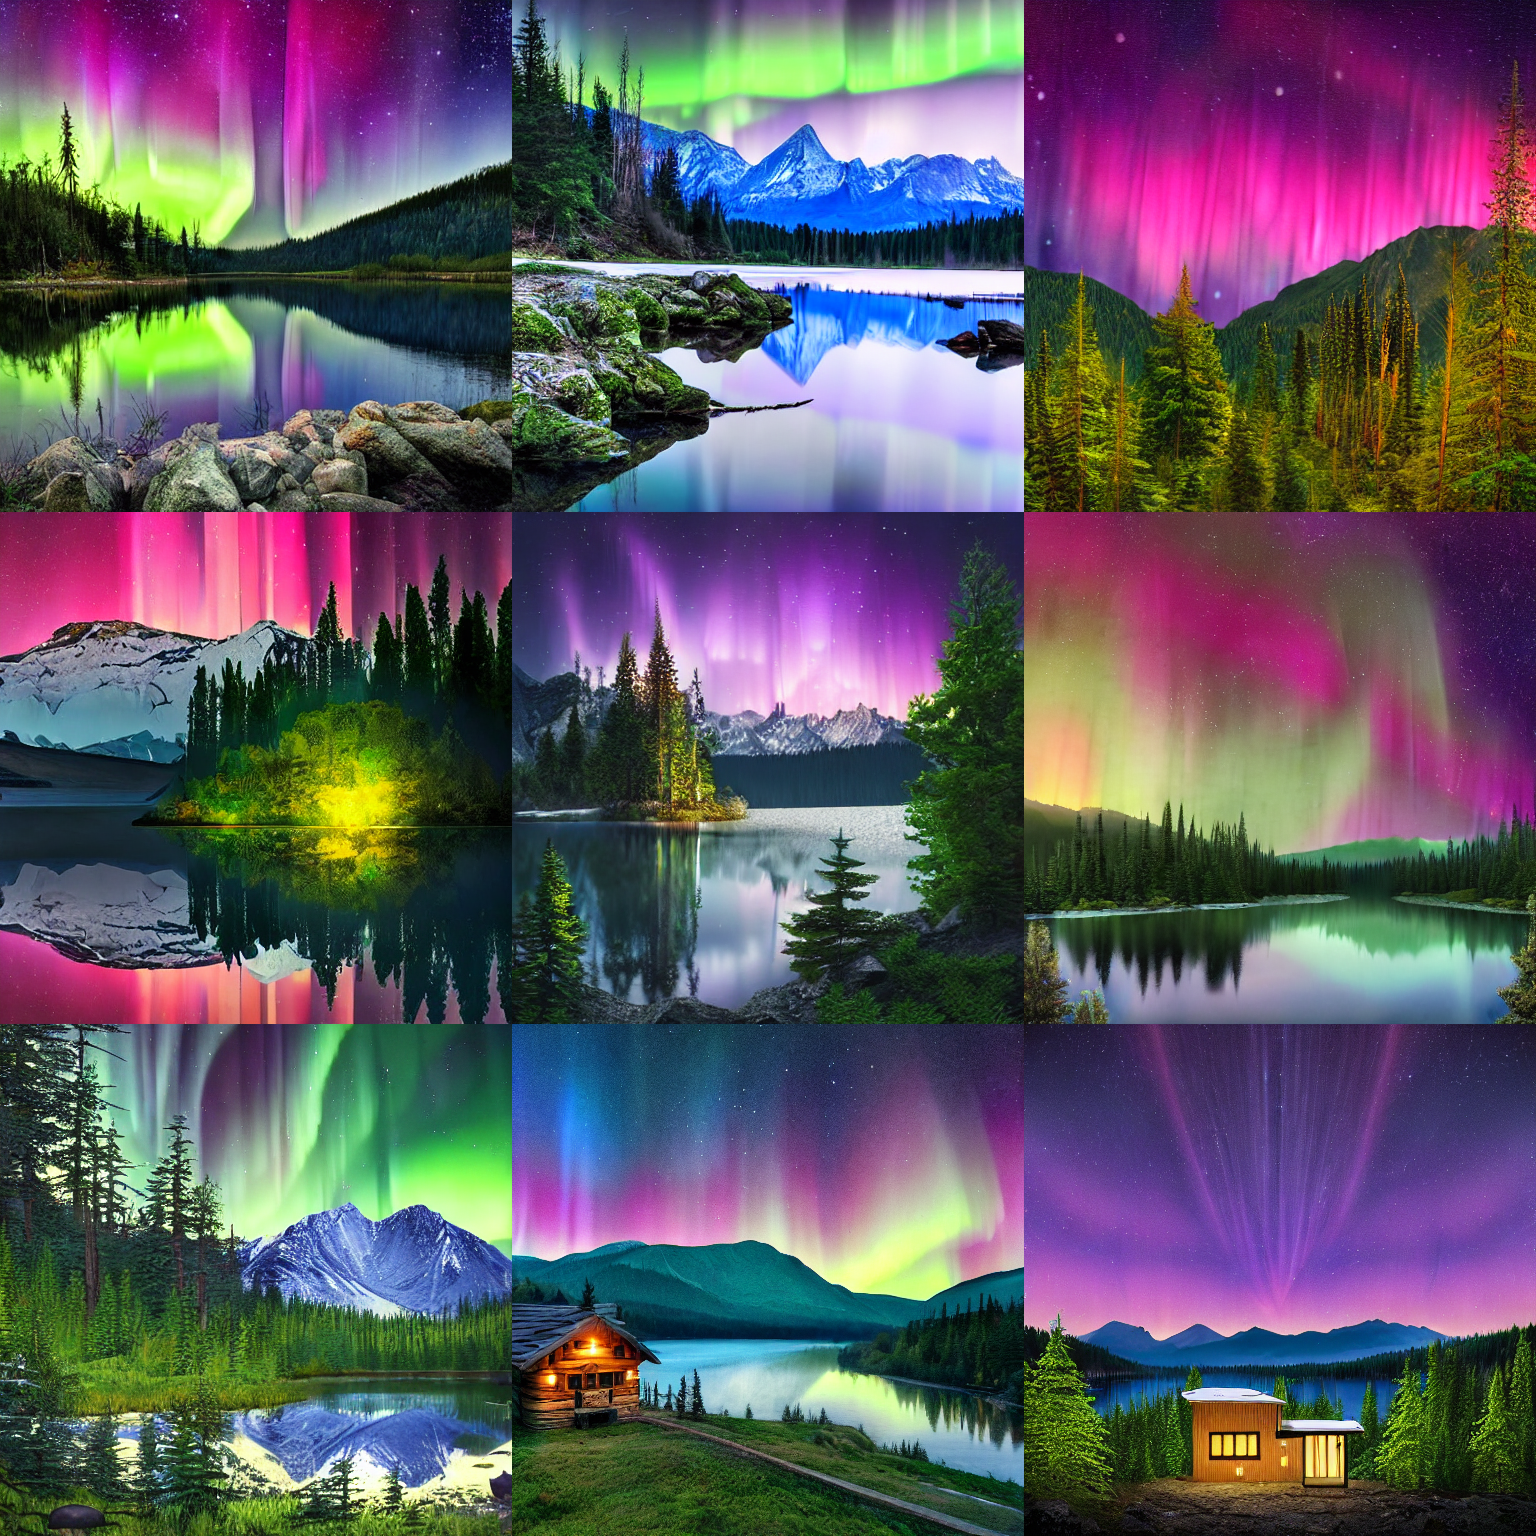

In [10]:
base_prompt = (
'''
beautiful mountains and forested landscape with cabine next to lake, early twilight, 
magical aurora, high quality painting photoreal, ray tracing
'''
) # refactor into callable interface

save_indv = True
save_grid = True

# grid size
num_cols = 3 # num_cols controls how many get generated at once, batching may be faster, but takes more vram
num_rows = 3

stripped_prompt = base_prompt.replace('\n','').strip('.')
prompt = [stripped_prompt] * num_cols
# generator = torch.Generator("cuda").manual_seed(1024)

output_name = stripped_prompt.replace('/','-') # .replace(' ', '_').replace(',', '+').replace('.', '-') # 

all_images = []
print('"'+stripped_prompt+'"'+' - StableDiffusion v1.4')
for i in range(num_rows):
    with autocast("cuda"):
        images = pipe(prompt, 
                      num_inference_steps=75, # more steps = potentially more quality default=50 
                      guidance_scale=8.0,     # controls how strictly ai adheres to the prompt default=7.5
                      height=512, width=512,  # can extend or contract, but will likely break global coherence
#                       generator=generator # uncomment along with generator above for seeded results
                     )["sample"]
    all_images.extend(images)
    grid = image_grid(images, rows=1, cols=num_cols)
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.imshow(grid, interpolation='bilinear')
    plt.show()
    if save_indv:
        for j in range(len(images)): # add check for already saved pictures and add identifier for repeat prompts
            images[j].save(os.getcwd()+ '\\output\\' + output_name + str(i) + str(j) + '.png')


print('"'+stripped_prompt+'"'+' - StableDiffusion v1.4')
grid = image_grid(all_images, rows=num_rows, cols=num_cols)
if save_grid:
    grid.save(os.getcwd()+ '\\output\\' + output_name + '.png')
grid

In [ ]:
import torch


with autocast("cuda"):
    image = pipe(prompt, generator=generator)["sample"][0]

image

In [ ]:
import torch

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_auth_token=True)
pipe = pipe.to(device)


In [ ]:
from diffusers import StableDiffusionPipeline, LMSDiscreteScheduler

model_id = "CompVis/stable-diffusion-v1-4"
# Use the K-LMS scheduler here instead
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, use_auth_token=True)
pipe = pipe.to("cuda")
